In [148]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
plt.rcParams['pcolor.shading']='auto'

# Relaxation method for Laplace equation
 The solution $V(\mathbf{r})$ to a Laplace equaiton has no maximum or minimum. The potential at one position is the average of the neighborhood.
 $$V(x,y) = \frac{1}{4} \left[V(x+dx,y)+V(x,y+dy)+V(x-dx,y)+V(x,y-dy)\right].$$
Using this idea, we can solve the potentail inside a domain $\mathcal V$, given the potential $V$ on the surface $\mathcal S$.
## Square capacitor
In this example, we will use the relaxation method to compute the capacitance of a square capacitor.

In [149]:
lx = 0.1 ## m
ly = 0.1 ## m
Nx = 200 ## number of x-grids
Ny = 200 ## number of y-grids
xv = np.linspace(-lx/2,lx/2,Nx)
yv = np.linspace(-ly/2,ly/2,Ny)
xm, ym = np.meshgrid(xv, yv)
dx = lx / Nx
dy = ly / Ny
pot = np.zeros((Nx,Ny))

In [150]:
## let's assume V_outer_shell = 1 V_inner_shell = 0
## Of course, the final capacitance will not depend on the V we choose.
## since capacitance is pure geometrical.
## BCs
def appl_BCs(pot_in):
    pot_out = pot_in
    pot_out[0,0:Ny-1] = 1
    pot_out[Nx-1,0:Ny] = 1
    pot_out[0:Nx-1,0] = 1
    pot_out[0:Nx-1,Ny-1] = 1

    pot_out[int(Nx/4),int(Ny/4):int(Ny/4*3)] = 0
    pot_out[int(Nx/4*3),int(Ny/4):int(Ny/4*3)+1] = 0
    pot_out[int(Nx/4):int(Nx/4*3),int(Ny/4)] = 0
    pot_out[int(Nx/4):int(Nx/4*3),int(Ny/4*3)] = 0
    
    return pot_out

pot =  appl_BCs(pot)


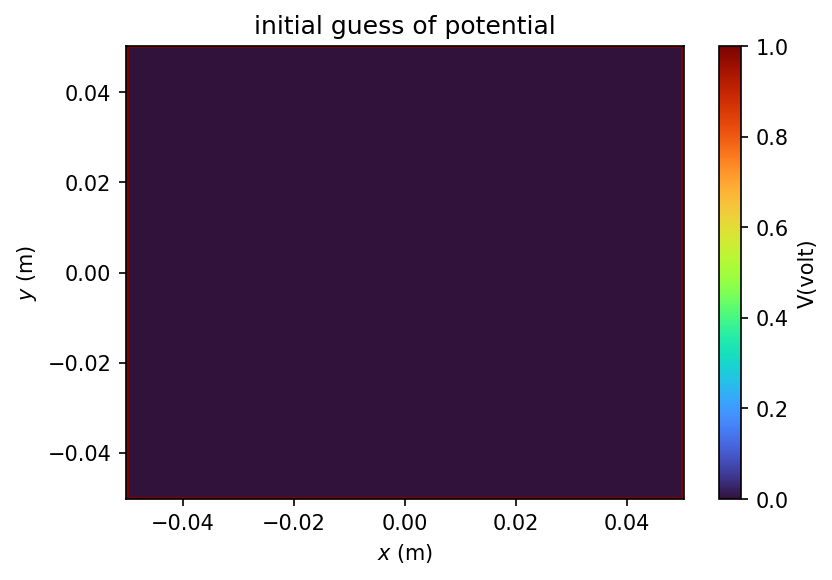

In [151]:
plt.figure(dpi=150)
plt.pcolormesh(xv,yv,pot.transpose(),cmap="turbo")
plt.colorbar(label=r'V(volt)')
plt.title(r"initial guess of potential")
plt.xlabel(r"$x$ (m)")
plt.ylabel(r"$y$ (m)")
plt.show()

In [152]:
Nt = 5000 # num of iteration 
for it in range(Nt):
    for ix in range(1,Nx-1):
        for iy in range(1,Ny-1):
            pot = appl_BCs(pot)
            pot[ix,iy] = 1/4 * (pot[ix,iy+1] + pot[ix+1,iy] + pot[ix-1,iy] + pot[ix,iy-1])

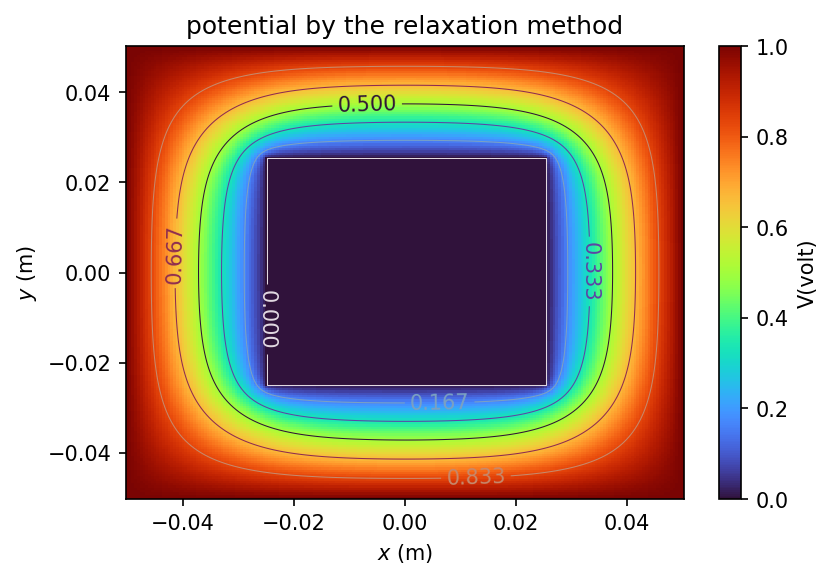

In [265]:
fig, ax = plt.subplots(dpi=150)
plt.pcolormesh(xv,yv,pot.transpose()**1,cmap="turbo")
plt.colorbar(label=r'V(volt)')
CS = ax.contour(xv,yv,pot.transpose()**1,linewidths=0.5,cmap='twilight',levels=np.linspace(0,1,7))
ax.clabel(CS, inline=True, fontsize=10)
plt.title("potential by the relaxation method")
plt.xlabel(r"$x$ (m)")
plt.ylabel(r"$y$ (m)")
plt.show()

Compute the E field using
$$\mathbf{E} = -\nabla V.$$
In principle, you can write your own algorithm of gradient using the 
finite difference method. Here, we directly use the one from **numpy** package. You can refer to the [link](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) for more details.

In [182]:
# Use the gradient to get E field
# see https://numpy.org/doc/stable/reference/generated/numpy.gradient.html
E_field =  np.gradient(-pot,dx,dy)
# E_field[0] is Ex
# E_field[1] is Ey

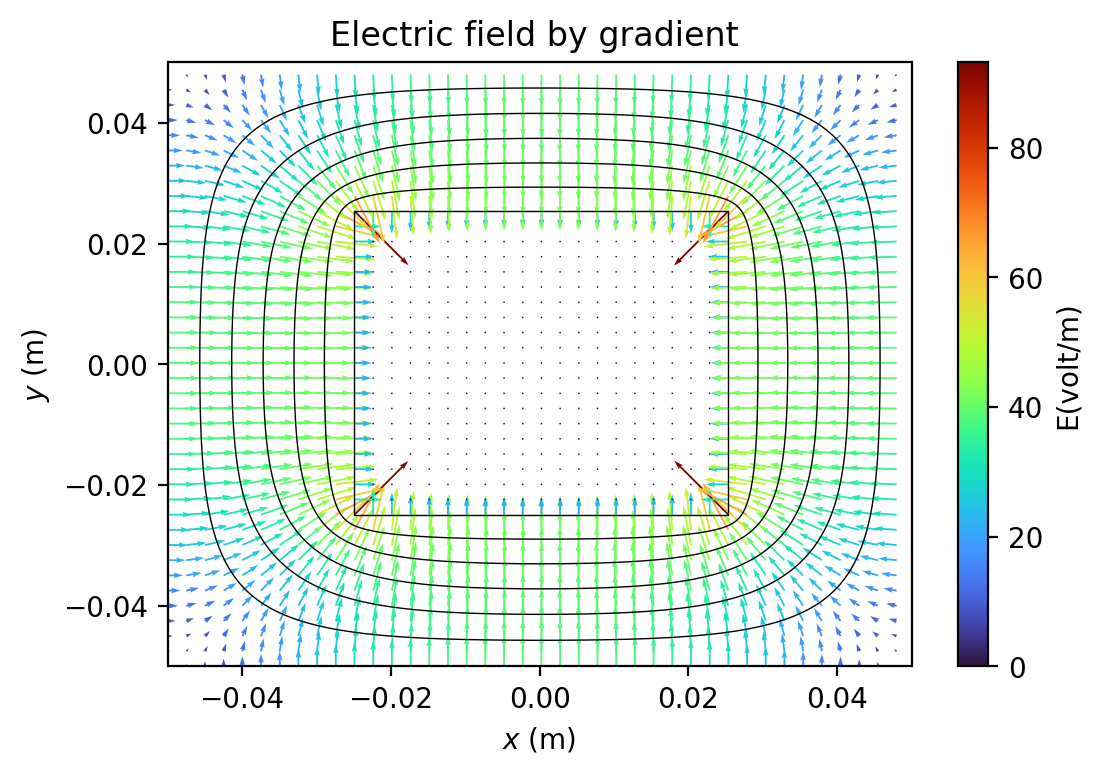

In [277]:
# Ref: https://pythonforundergradengineers.com/quiver-plot-with-matplotlib-and-jupyter-notebooks.html
plt.figure(dpi=200)
#plt.subplot(2,1,1)
skip = (slice(None, None, 5), slice(None, None, 5)) ## make a sparse plot
Ex = E_field[0].transpose()**1
Ey = E_field[1].transpose()**1

color = np.sqrt((Ex[skip])**2 + (Ey[skip])**2)



plt.contour(xv,yv,pot.transpose()**1,linewidths=.5,colors='k',levels=np.linspace(0,1,7))

plt.quiver(xm[skip],ym[skip],Ex[skip],Ey[skip],color,cmap=plt.cm.turbo,width= 0.0025,scale=900)

plt.title("Electric field by gradient ")
plt.colorbar(label=r'E(volt/m)')
plt.xlabel(r"$x$ (m)")
plt.ylabel(r"$y$ (m)")
plt.xlim([-lx/2,lx/2])
plt.ylim([-ly/2,ly/2])

plt.show()


Use the Gauss theorem to compupte the charge on the outer shell.
$$\int \mathbf{E}\cdot d\mathbf{a}= \frac{Q_{enc}}{\epsilon_0}$$

In [278]:
#
lz = 1 # m; we assume the capacitor is infinite in the z direction.
       # for calculation, we give it a value l = 1 m. It does not matter since later we will divide it by lz  
eps0 = 8.85E-12 # coulomb/volt/m
qenc =  eps0 * np.abs(np.sum(Ex[:,0])) * dy * lz # coulomb 
qtot = qenc * 4 # 4 sides are equal in this case. unit: coulomb  
capa = qtot / 1 #  Farad
capa_per_lz = capa / lz # Farad/m 

In [279]:
print('The capacitance per unit length is '+ str(capa_per_lz) + ' Farad/m')

The capacitance per unit length is 9.031439653567848e-11 Farad/m


Let's compare this answer to the analytic reslut of a 
cylindrical capacitor of an inter radius 0.5 m and an outer radius 1m. 
$$\frac{C}{l_z} = \frac{2\pi\epsilon_0 }{\ln\left(\frac{b}{a}\right)}=8.022\times10^{-11}~\mbox{Farad/m}$$ 
The orders of magnitude of the two cases are the same. 
This suggests that the numerical result is probably right.
But, why does a square one have a greater capacitance?
Do you have a simple explanation?

In [280]:
np.pi * 2 *eps0/np.log(2)

8.022277451034134e-11